This project is a brief demonstration of a supervised machine learning technique (decision trees), coupled with heat map visualizations.

# Import

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Cleaning

In [ ]:
target = 'species'

In [ ]:
df = df.dropna()

y = df[target]

#convert categorical to dummmy, get all explanatory variables
X = pd.get_dummies(df.drop(columns=[target]))

In [ ]:
#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .5)

# Analysis

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#fit model
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
#get predicted values
y_pred = clf.predict(X_test)

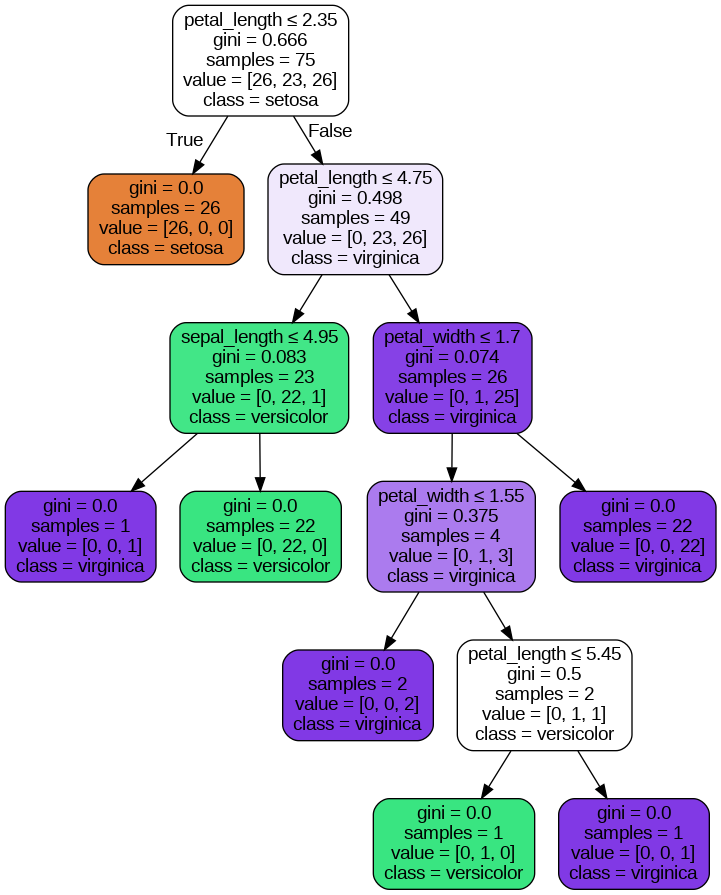

In [ ]:
#veiw model
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                           feature_names=X.columns, #identifying the explantory columns
                           class_names=y.unique(), #identifying the target clasifications
                           filled=True, rounded=True,
                           special_characters=True)



graph = graphviz.Source(dot_data)

Image(graph.render("iris", format='png'))

In [ ]:
model_output = pd.DataFrame(data={'prediction': y_pred, 'actucal': y_test})
model_output['error'] = model_output['prediction'] == model_output['actucal']
model_output


,prediction,actucal,error
117,virginica,virginica,True
100,virginica,virginica,True
70,virginica,versicolor,False
89,versicolor,versicolor,True
47,setosa,setosa,True
...,...,...,...
13,setosa,setosa,True
43,setosa,setosa,True
120,virginica,virginica,True
19,setosa,setosa,True


In [ ]:
#manually calculate accuracy
accuracy = model_output['error'].sum() / model_output['error'].count()
accuracy

0.92

In [ ]:
#have SKlearn calculate accuracy for you
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.92

In [ ]:
#advanced error report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        24
  versicolor       1.00      0.78      0.88        27
   virginica       0.80      1.00      0.89        24

    accuracy                           0.92        75
   macro avg       0.93      0.93      0.92        75
weighted avg       0.94      0.92      0.92        75



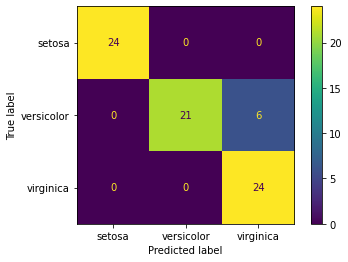

In [ ]:
#create cunfusion matrix
from matplotlib import pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=y.unique())
cm_display.plot(values_format='d')
plt.show()

In [ ]:
#turn the cunfusion matrix into a dataframe
cm_df = pd.DataFrame(cm, columns=y.unique(), index=y.unique())
cm_df

,setosa,versicolor,virginica
setosa,24,0,0
versicolor,0,21,6
virginica,0,0,24


In [ ]:
from google.colab import files
cm_df.to_csv('cm_df.csv')
#files.download("cm_df.csv")

# Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3,4,5,6,7], 'min_samples_leaf': [5,10,15,20,25,30]} #trying all the combinations of tree depth and_leaf
grid_clf = GridSearchCV(clf, param_grid) #applies parameters to model
grid_clf.fit(X_train, y_train)
best_tree = grid_clf.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

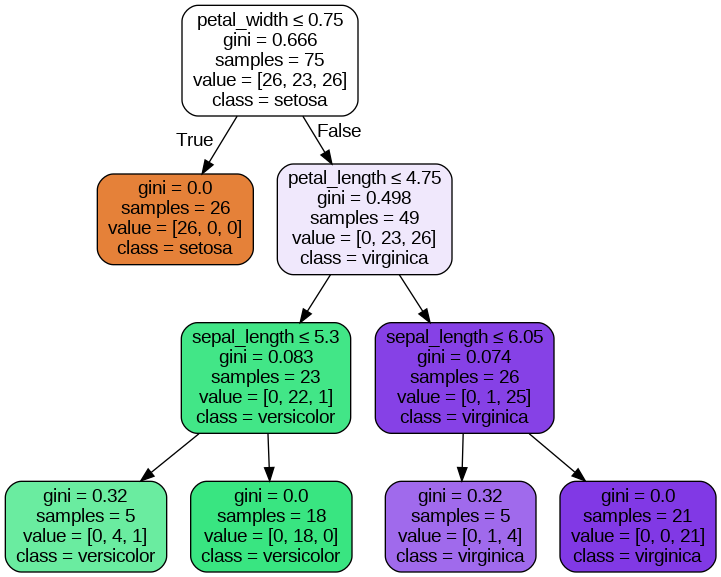

In [ ]:
dot_data = export_graphviz(best_tree, out_file=None,
                           feature_names=X.columns, #identifying the explantory columns
                           class_names=y.unique(), #identifying the target clasifications
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)

Image(graph.render("iris", format='png'))

In [ ]:
#predict with the tuned model
y_pred_best = best_tree.predict(X_test)

In [ ]:
accuracy_best = metrics.accuracy_score(y_test, y_pred_best)
accuracy_best

0.9333333333333333

In [ ]:
print(accuracy)
print(accuracy_best)
print(accuracy_best - accuracy)

0.92
0.9333333333333333
0.013333333333333308


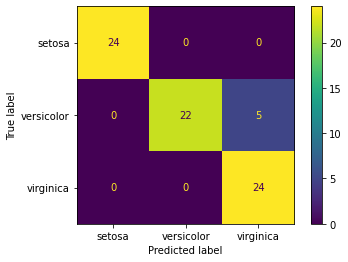

In [ ]:
#new confusion matrix
from matplotlib import pyplot as plt
cm_best = metrics.confusion_matrix(y_test, y_pred_best)
cm_display = metrics.ConfusionMatrixDisplay(cm_best, display_labels=y.unique())
cm_display.plot(values_format='d')
plt.show()

In [ ]:
cm_df_best = pd.DataFrame(cm_best, columns=y.unique(), index=y.unique())
cm_df_best

,setosa,versicolor,virginica
setosa,24,0,0
versicolor,0,22,5
virginica,0,0,24


In [ ]:
from google.colab import files
cm_df.to_csv('cm_df.csv')
#files.download("cm_df.csv")

# Custom Graphs

In [ ]:
import matplotlib.colors as mcolors

# Define the hex codes and positions of each segment
hex_codes = ["#FFFFFF", "#D14124", "#FFFFFF","#FFFFFF", "#FFFFFF", "#0093D3"] # red, green, blue
positions = [0, 0.5, 1]

# Convert the hex codes to RGB values
colors = list(map(mcolors.to_rgba, hex_codes))

# Create the colormap
cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", colors, N=256)


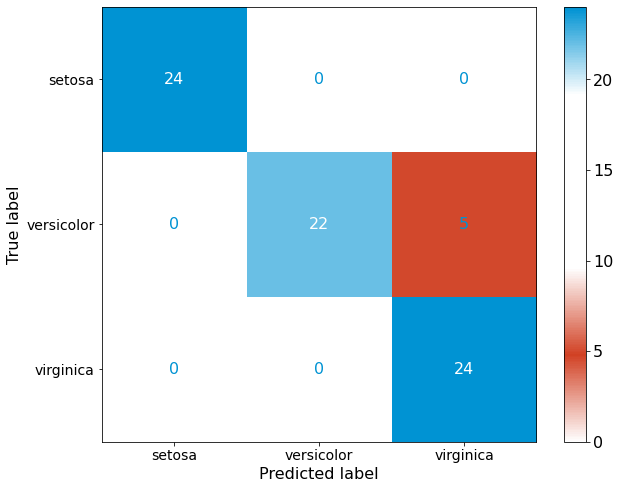

In [ ]:
from matplotlib import pyplot as plt
cm_best = metrics.confusion_matrix(y_test, y_pred_best)
cm_display = metrics.ConfusionMatrixDisplay(cm_best, display_labels=y.unique())
cm_display.plot(values_format='d', cmap=cmap)
cm_display.figure_.set_size_inches(10, 8)

cm_display.ax_.set_xticklabels(y.unique(),fontsize=14)
cm_display.ax_.set_yticklabels(y.unique(),fontsize=14)

cm_display.text_
    #text.set_color('black')

font = {'family' : 'san serif', #or serif
    'weight' : 'normal',
    'size'   : 16,}
plt.rc('font', **font)

plt.show()

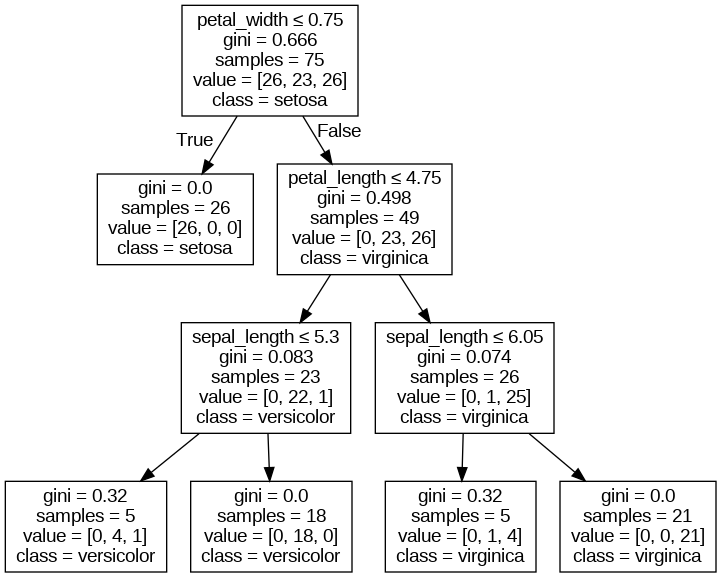

In [ ]:
dot_data = export_graphviz(best_tree, out_file=None,
                           feature_names=X.columns, #identifying the explantory columns
                           class_names=y.unique(), #identifying the target clasifications
                           filled=False, rounded=False,
                           special_characters=True)

graph = graphviz.Source(dot_data)

Image(graph.render("iris", format='png'))